In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [5]:
df = pd.read_csv('/Users/sonikakhanna/Downloads/diamonds.csv')

In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [11]:
df = df.dropna()

In [12]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
le.fit(df['cut'])

LabelEncoder()

In [15]:
col_list = ['cut','color','clarity']

In [16]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [17]:
X = df[['cut','color','clarity','carat', 'color', 'clarity', 'depth', 'table',
       'x', 'y', 'z']]
Y = df['price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.50,random_state=100)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train,Y_train)

LinearRegression()

In [24]:
Y_train_pred = lr.predict(X_train)

In [25]:
Y_pred = lr.predict(X_test)

In [26]:
X_range = [i for i in range(len(Y_test))]

In [19]:
from sklearn.metrics import r2_score,mean_squared_error

In [28]:
mean_squared_error(Y_test,Y_pred)

1825974.8475314034

In [29]:
mse = mean_squared_error(Y_test,Y_pred)

In [30]:
rsq1 = r2_score(Y_test,Y_pred)

In [31]:
print('mean squared error :',mse)
print('r square :',rsq1)

mean squared error : 1825974.8475314034
r square : 0.8851358522752535


In [32]:
rsq2 = r2_score(Y_train, Y_train_pred)
print('r square :',rsq2)

r square : 0.8850421760980541


In [31]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
clf = DecisionTreeRegressor(min_samples_split = 2000, max_depth=5)

In [42]:
Y_train

26546    16231
9159      4540
14131     5729
15757     6300
24632    12968
         ...  
11284     4975
44732     1617
38158     1014
860       2871
15795     6320
Name: price, Length: 43152, dtype: int64

In [43]:
clf = clf.fit(X_train, Y_train)

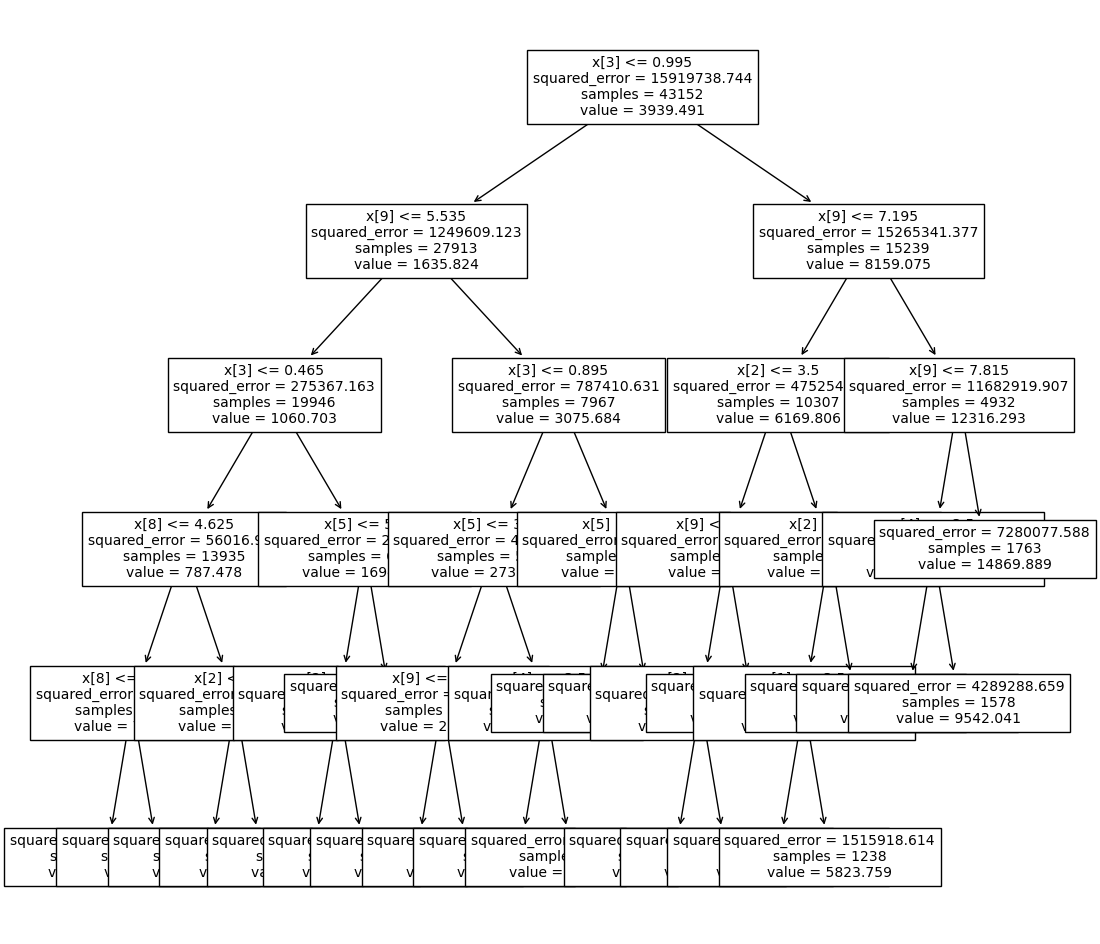

In [46]:
from sklearn import tree
# tree.plot_tree(clf)
plt.figure(figsize=(12,12))  
tree.plot_tree(clf, fontsize=10)
plt.show()


In [38]:

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("husl")
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

Text(0.5, 1.0, 'Distribution of Diamond Price')

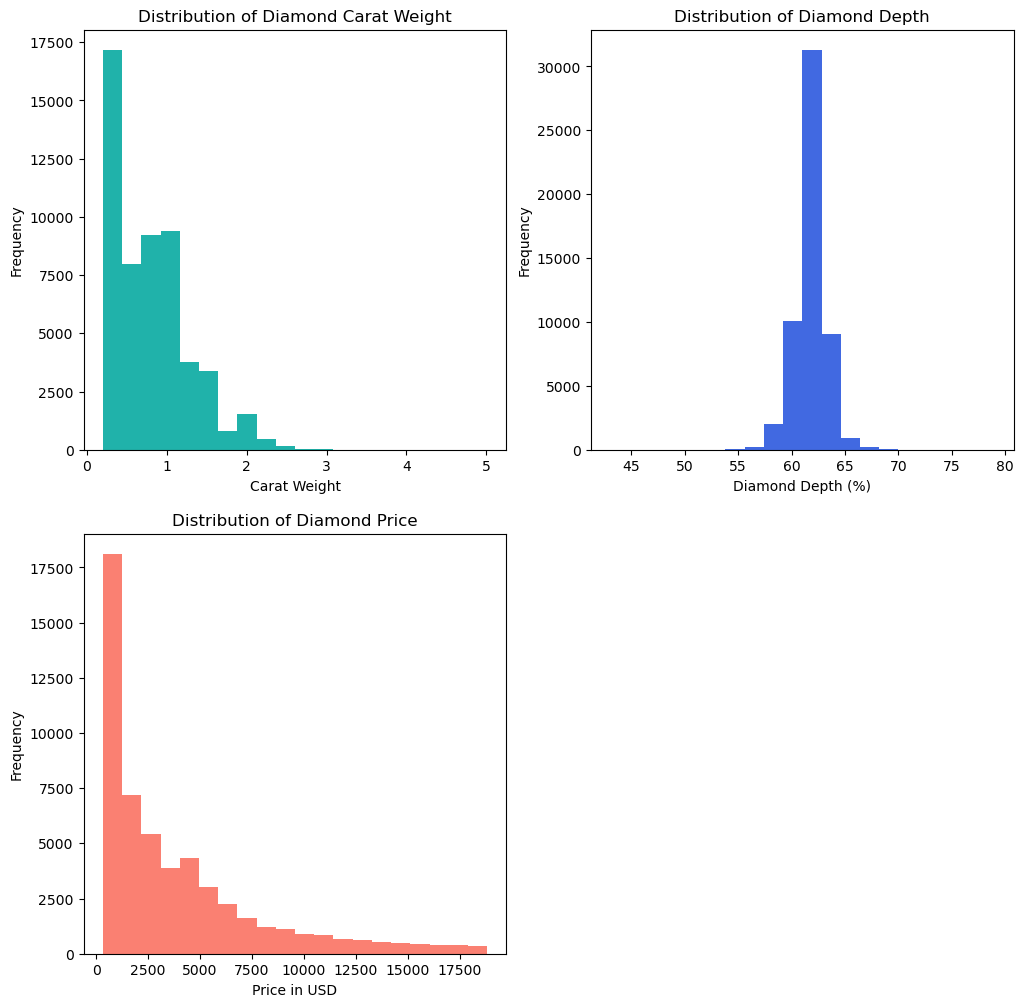

In [39]:
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(df['carat'],bins=20,color='lightseagreen')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(df['depth'],bins=20,color='royalblue')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(df['price'],bins=20,color='salmon')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

Diamond depth as can be seen from the second plot above is normally distributed. Majority diamonds seem to have a depth of ~60-65% range.
This is consistent with our intuition about diamonds as optimum depth is needed to fit any diamond in piece of jewellery like ring


Similarly, diamond price is also right skewed which is again consistent with an intuitive observation. Majority of the diamonds in this dataset have a price below 5000 USD

/var/folders/cf/6twhyzx56xj6q56wvg1n5qwm0000gn/T/ipykernel_32469/4210974960.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

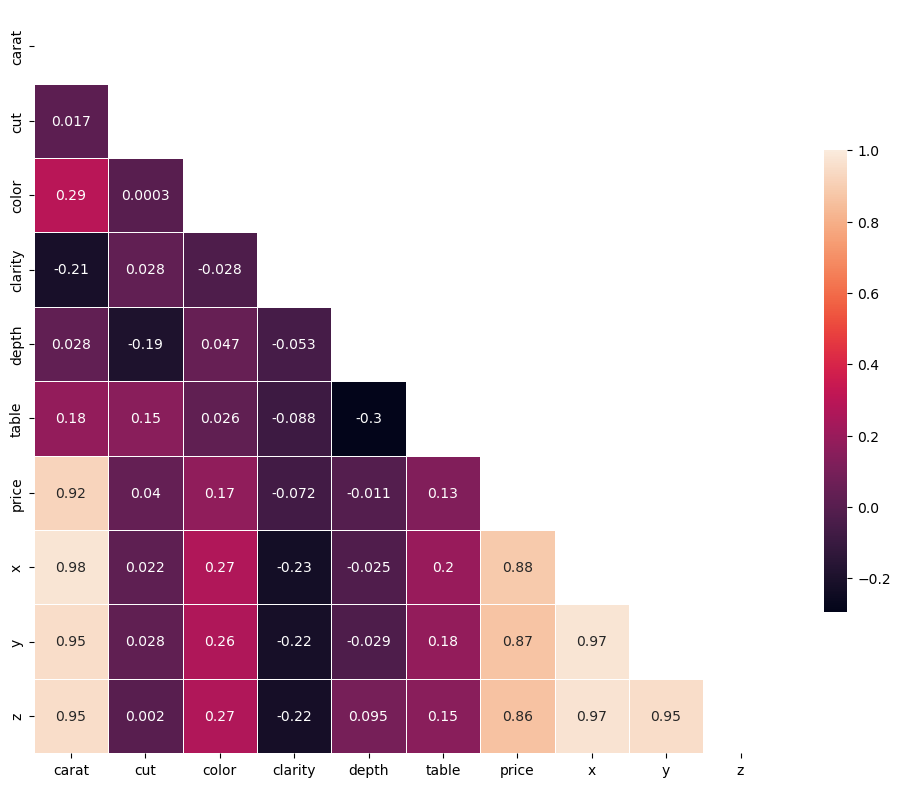

In [40]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Clearly, price has strong correlation with all three size dimensions.

<Axes: xlabel='z', ylabel='price'>

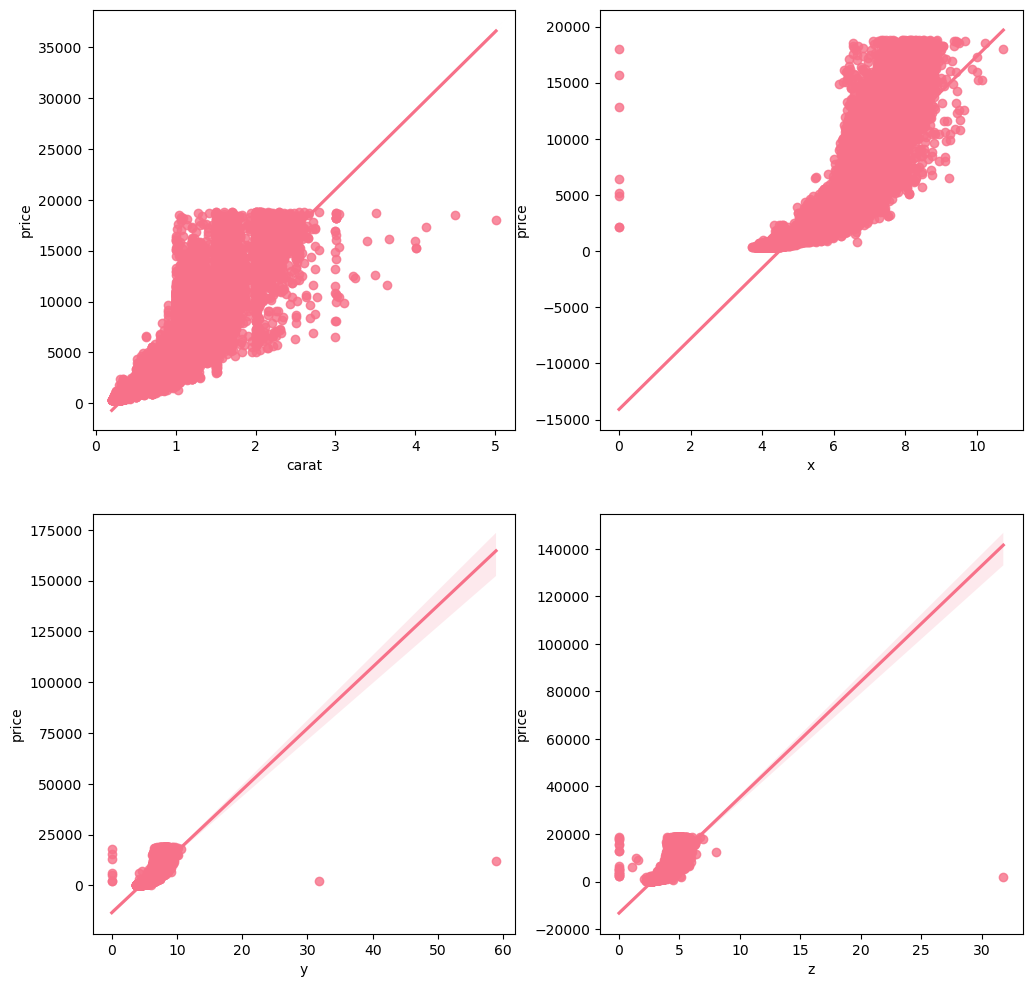

In [45]:
fig, saxis = plt.subplots(2, 2,figsize=(12,12))

sns.regplot(x = 'carat', y = 'price', data=df, ax = saxis[0,0])
sns.regplot(x = 'x', y = 'price', data=df, ax = saxis[0,1])
sns.regplot(x = 'y', y = 'price', data=df, ax = saxis[1,0])
sns.regplot(x = 'z', y = 'price', data=df, ax = saxis[1,1])

relationship of each of these variables with price.

In [8]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
import seaborn as sns

<Axes: xlabel='cut', ylabel='price'>

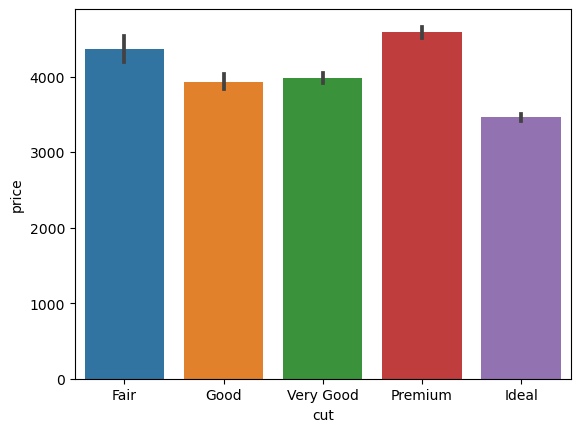

In [12]:
sns.barplot(x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], data=df)

<Axes: xlabel='color', ylabel='price'>

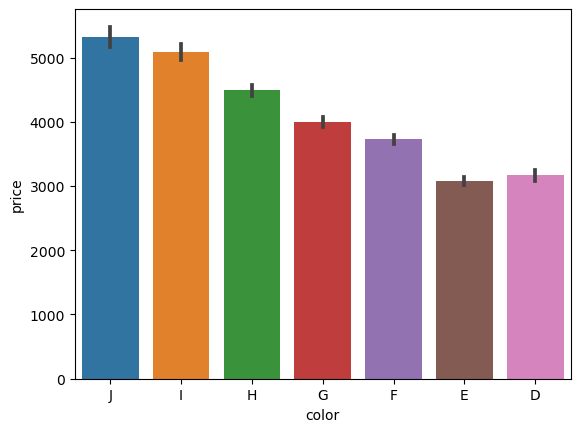

In [13]:
sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=df)

<Axes: xlabel='clarity', ylabel='price'>

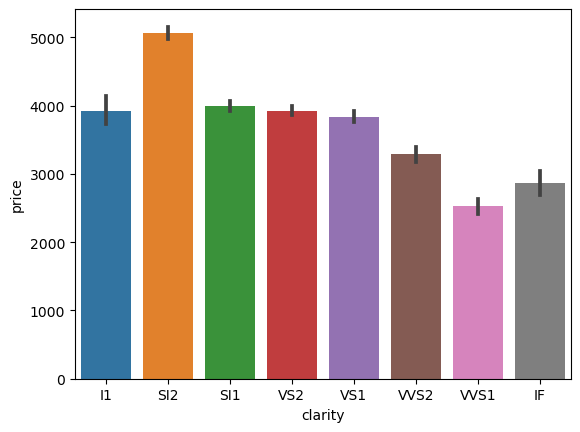

In [14]:
sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=df)

In [61]:
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression,Ridge,Lasso, ElasticNet,SGDRegressor


from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

import os

In [62]:
data =pd.read_csv('/Users/sonikakhanna/Downloads/diamonds.csv')


In [63]:
print(data.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [64]:
del data[data.columns[0]]

In [65]:
data.isnull().values.any()

False

In [66]:
data.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
data.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [67]:
data['L/W'] = data['length']/data['width']

In [68]:
print(data.head())

   carat      cut color clarity  depth %  table %  price  length  width  \
0   0.23    Ideal     E     SI2     61.5     55.0    326    3.95   3.98   
1   0.21  Premium     E     SI1     59.8     61.0    326    3.89   3.84   
2   0.23     Good     E     VS1     56.9     65.0    327    4.05   4.07   
3   0.29  Premium     I     VS2     62.4     58.0    334    4.20   4.23   
4   0.31     Good     J     SI2     63.3     58.0    335    4.34   4.35   

   depth       L/W  
0   2.43  0.992462  
1   2.31  1.013021  
2   2.31  0.995086  
3   2.63  0.992908  
4   2.75  0.997701  


In [69]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth %  53940 non-null  float64
 5   table %  53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   depth    53940 non-null  float64
 10  L/W      53933 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB
None
(53940, 11)


In [70]:
print(data['cut'].unique().tolist())
print(data['clarity'].unique().tolist())
print(data['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [71]:
data.describe()

,carat,depth %,table %,price,length,width,depth,L/W
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572


In [72]:
print(data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) | (data['L/W'] == 0)] )
print('length :',len(data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) | (data['L/W'] == 0)]))

       carat        cut color clarity  depth %  table %  price  length  width  \
2207    1.00    Premium     G     SI2     59.1     59.0   3142    6.55   6.48   
2314    1.01    Premium     H      I1     58.1     59.0   3167    6.66   6.60   
4791    1.10    Premium     G     SI2     63.0     59.0   3696    6.50   6.47   
5471    1.01    Premium     F     SI2     59.2     58.0   3837    6.50   6.47   
10167   1.50       Good     G      I1     64.0     61.0   4731    7.15   7.04   
11182   1.07      Ideal     F     SI2     61.6     56.0   4954    0.00   6.62   
11963   1.00  Very Good     H     VS2     63.3     53.0   5139    0.00   0.00   
13601   1.15      Ideal     G     VS2     59.2     56.0   5564    6.88   6.83   
15951   1.14       Fair     G     VS1     57.5     67.0   6381    0.00   0.00   
24394   2.18    Premium     H     SI2     59.4     61.0  12631    8.49   8.45   
24520   1.56      Ideal     G     VS2     62.2     54.0  12800    0.00   0.00   
26123   2.25    Premium     

In [73]:
data[['length','width','depth','L/W']]=data[['length','width','depth','L/W']].replace(0,np.NaN)

data.dropna(inplace=True)


In [74]:
data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) | (data['L/W'] == 0) ]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W


In [75]:
print(data.isnull().sum())
print('shape:',data.shape)

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
L/W        0
dtype: int64
shape: (53920, 11)


From the above output, we can see that the null values and the rows which contained 0 value are deleted. Moreover, the dimension of the data has now become 53920 rows with 11 features.

 the correlation between each feature using corr() function and plotting the values using heatmap

<Axes: >

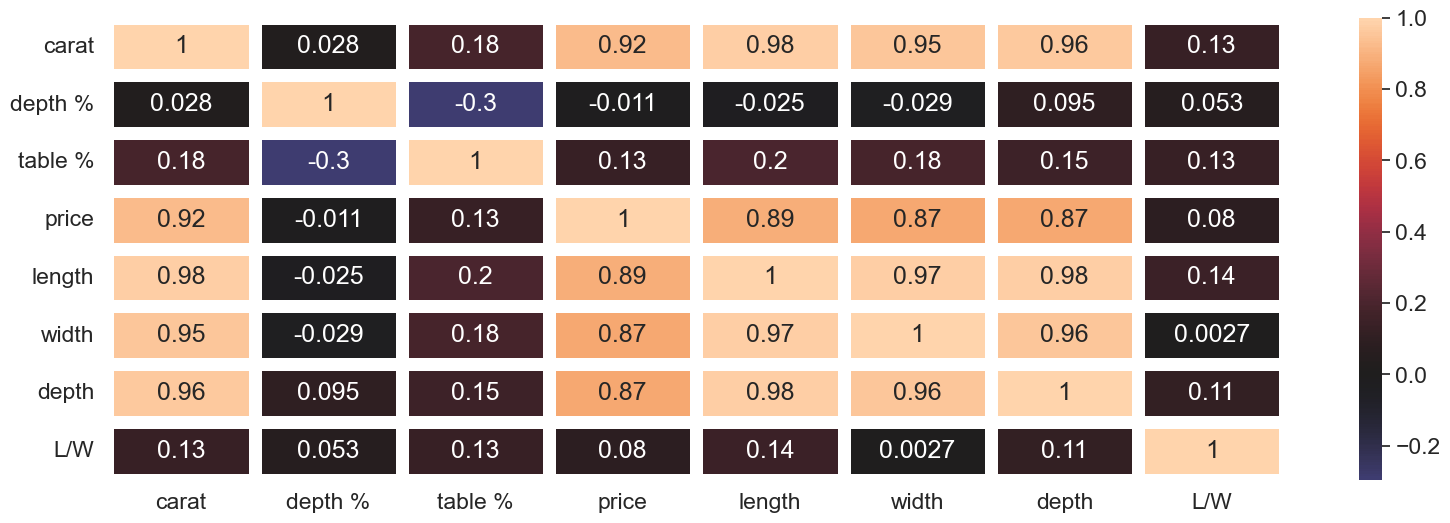

In [76]:
f, ax = plt.subplots(figsize=(19, 6))
sns.heatmap(data.corr(), annot=True, linewidths=8, center=0,ax=ax)

We can see that carat, length, width, depth, and price are having a high correlation with each other.

However, the categorical data is not taken into account. Since these categories are considered as essential factors for pricing the diamond, therefore, we will compare each category feature with the price.

<Axes: xlabel='color', ylabel='price'>

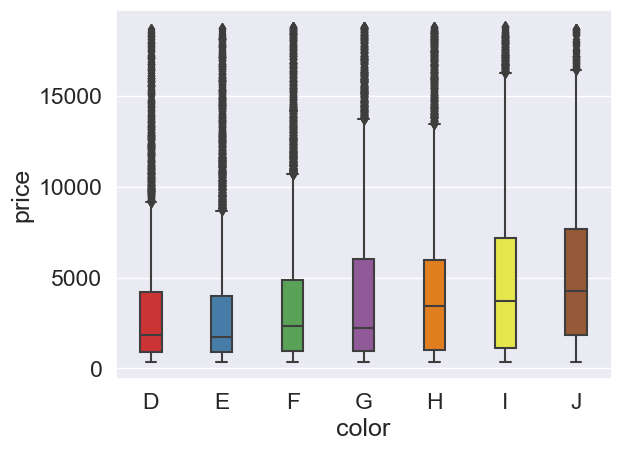

In [77]:
sns.boxplot(y='price',data=data,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )


we can see that G, H, I and J type color has less number of outliers compared to D and E.It suggests that the better the quality of color the higher the outliers except for G type color. Also, each category type has the same maximum and minimum price.

<Axes: xlabel='cut', ylabel='price'>

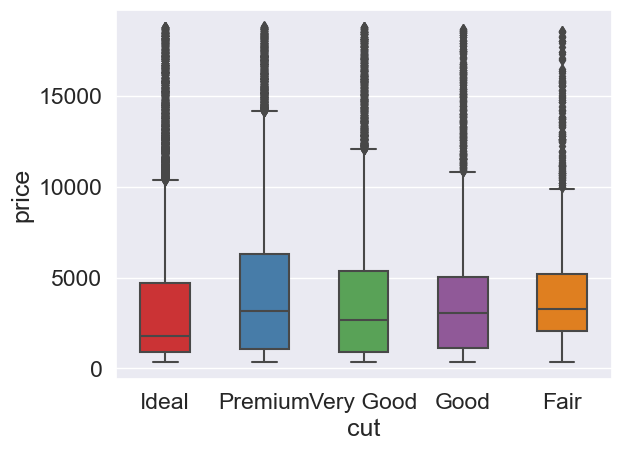

In [78]:
sns.boxplot(y='price',data=data,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

From the above plot, we can see that the lower the quality of cut, the higher the number of outliers except for the Ideal cut type. Also, each category type has the same maximum and minimum price.

<Axes: xlabel='clarity'>

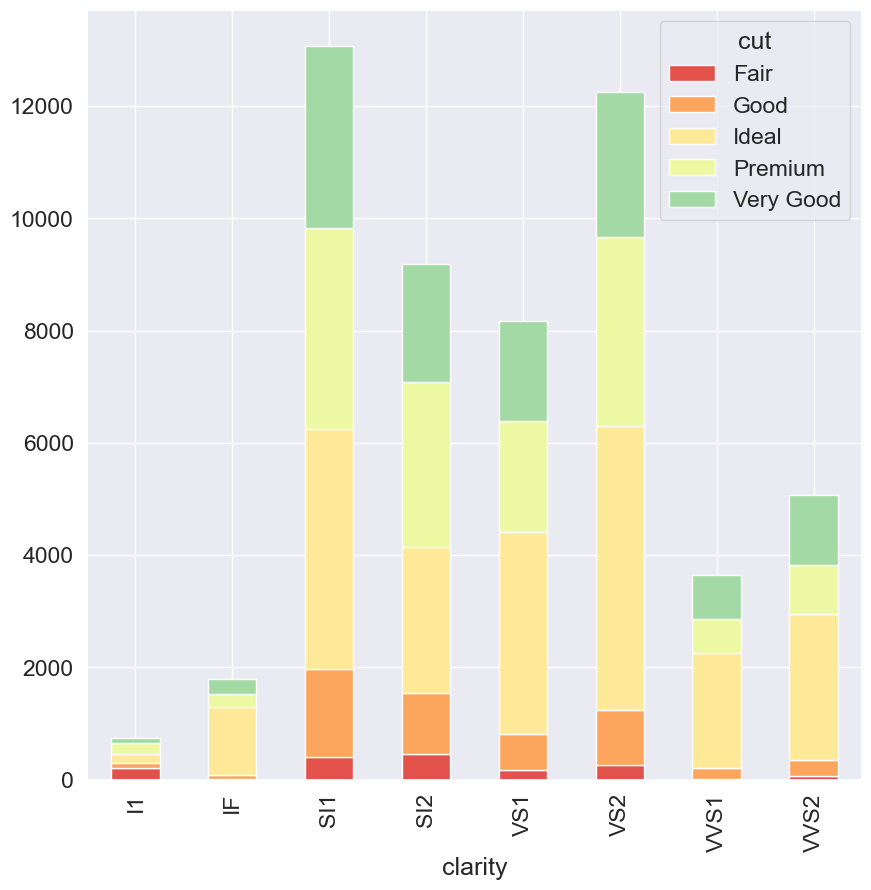

In [79]:
clarity_cut_table = pd.crosstab(index=data["clarity"], columns=data["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category. Moreover, we can infer that people are not taking the highest clarity diamonds, such as IF or VVS1 and others . and are ready to sacrifice on clarity but are more focusing on the cut of the diamonds

<Axes: xlabel='cut'>

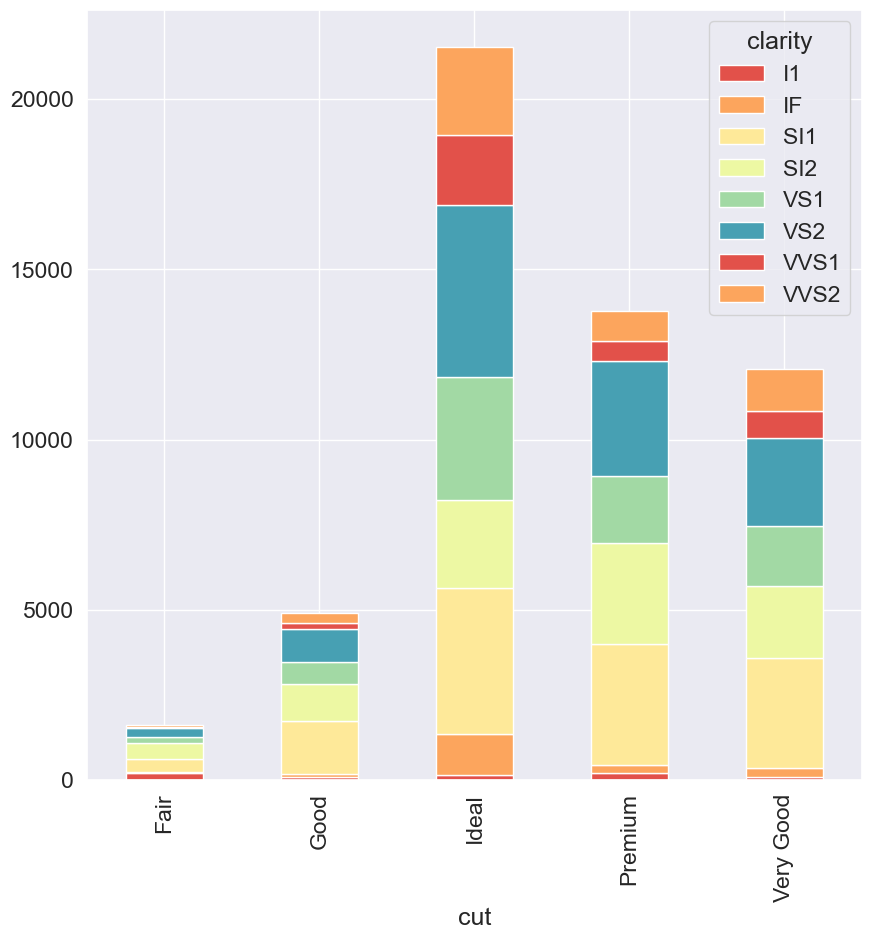

In [80]:
cut_clarity_table = pd.crosstab(index=data["cut"], columns=data["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity

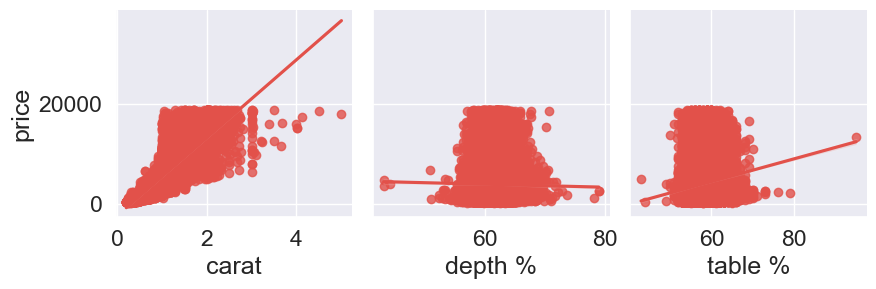

In [81]:
g= sns.pairplot(data , height=3, aspect =1, x_vars = ['carat','depth %','table %'] , y_vars =  ['price'] , kind = 'reg')

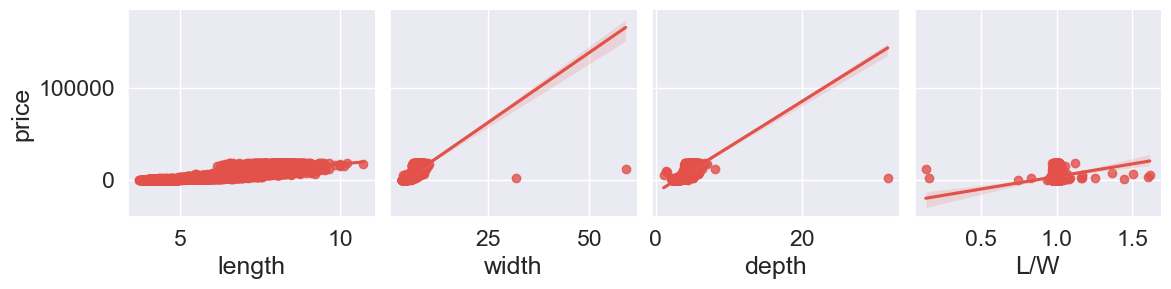

In [82]:
g= sns.pairplot(data , height=3, aspect =1, x_vars = ['length','width','depth','L/W'] , y_vars =  ['price'] , kind = 'reg')

We could see that carat, length, width, and depth are showing linearity with price with fewer outliers and table %, depth %, and L/W are showing linearity but with high outliers.

In [83]:
data['clarity_score']=data['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[8,7,6,5,4,3,2,1])
data['color_score'] = data['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
data['cut_score'] = data['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])

data.head()

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W,clarity_score,color_score,cut_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,2,6,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,3,6,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,5,6,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,2,1,2


In [84]:
data_score = data.copy()

In [85]:
X=DataFrame(data_score,columns =['carat','cut_score','clarity_score','color_score','table %','depth %','L/W','depth','length','width'])
Y=DataFrame(data_score,columns =['price'])

In [86]:
skY=data['price'].skew()
skY

1.6183486340820077

In [87]:
data_score = DataFrame({'price':np.log(data_score['price'])})


In [88]:
sk=data_score['price'].skew()
sk

0.11546088919707363

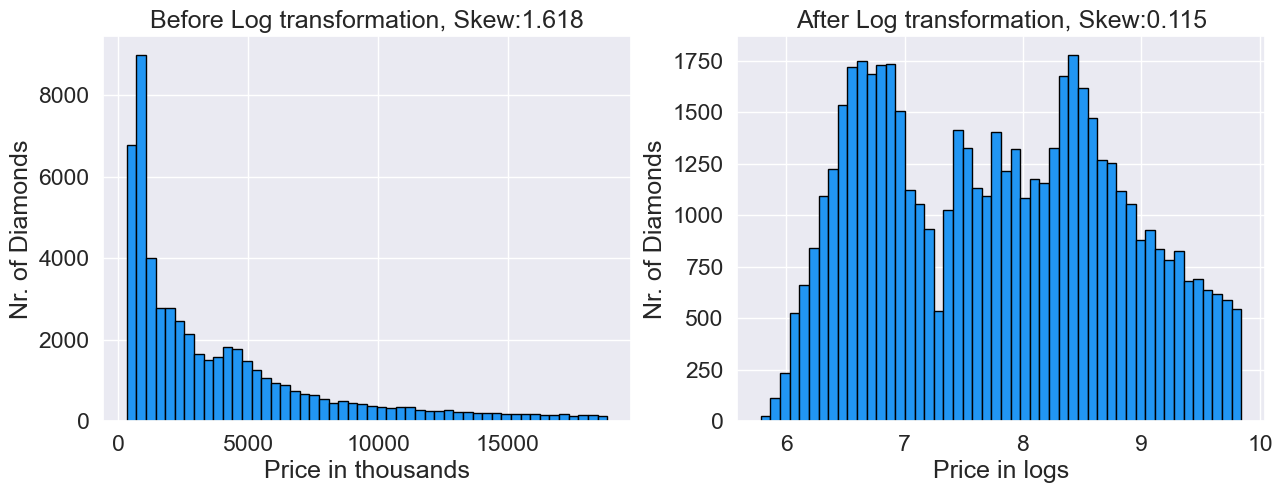

In [89]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.hist(data['price'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in thousands')
plt.ylabel('Nr. of Diamonds')
plt.title(f'Before Log transformation, Skew:{round(skY,3)}')

plt.subplot(1,2,2)
Y = np.log(Y['price'])
plt.hist(Y, bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in logs')
plt.ylabel('Nr. of Diamonds')
plt.title(f'After Log transformation, Skew:{round(sk,3)}')
plt.show()

As we have selected our features, we are going to split the dataset into train and test set where 80 percent of the data will go into the training set, and the remaining 20 percent will go into the test.

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)
# Y_train = DataFrame(Y_train)
# Y_test=DataFrame(Y_test)

In [91]:
# scale = StandardScaler()
# X_train = DataFrame(scale.fit_transform(X_train[['carat','depth %','table %','length','width','depth', 'clarity_score' ,'color_score', 'cut_score','L/W']]),columns=['carat','depth %','table %','length','width','depth', 'clarity_score' ,'color_score', 'cut_score','l/W'],index=X_train.index)
# X_test = DataFrame(scale.transform (X_test[['carat','depth %','table %','length','width','depth', 'clarity_score' ,'color_score', 'cut_score','L/W']]),columns=['carat','depth %','table %','length','width','depth', 'clarity_score' ,'color_score', 'cut_score','l/W'],index=X_test.index)
# print(X_train.head())


instead of transforming the whole dataset, we are only transforming training and test data separately. Because if we convert the whole dataset, information about the distribution of the dataset will be known by algorithms, which means it cannot process the outliers efficiently. T

In [92]:
dlin = LinearRegression()
dlin.fit(X_train, Y_train)
y_pred = dlin.predict(X_test)
print('####### Linear Regression #######')
print('Score : %.4f' % dlin.score(X_test, Y_test))
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('R2     : %0.2f ' % r2)
n=X_test.shape[0]
p=X_test.shape[1]
adj_rsquared = 1 - (1 - r2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

####### Linear Regression #######
Score : 0.9787

MSE    : 0.02 
R2     : 0.98 
Adjusted R Squared: 0.9786957028785376


From the above output, we can see that ( 𝑅2
 ) value is 0.97 and MSE is 869465. Based on the score, we can that this model prediction is accurate. However, we need to analyze regression assumptions such as multicollinearity, autocorrelation,  and normal distribution to validate our regression model.



In [93]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['length','width','depth'], axis=1)

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

r2_lr=results.rsquared
mse_lr =results.mse_resid
ar2_lr =results.rsquared_adj
ar2_lr = results.rsquared_adj
print('r-squared is', r2_lr)
print('MSE is', results.mse_resid)
print('Adjusted R -sqaure is', results.rsquared_adj)
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)})

r-squared is 0.8808161269294702
MSE is 0.1223254805940173
Adjusted R -sqaure is 0.8807967824870779


,coef_name,vif
0,const,11650.35
1,carat,1.30
2,cut_score,1.50
3,clarity_score,1.21
4,color_score,1.12
5,table %,1.61
6,depth %,1.33
7,L/W,1.06


From the above output, we can see that there are no features that are co-related with each other as all the feature's VIF value is less than 10.However our model's accuracy has been decreased as the R-square, and MSE value has been reduced to 0.85.